In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_user = pd.read_csv('data/train_preliminary/user.csv')
train_user.head()

,user_id,age,gender
0,1,4,1
1,2,10,1
2,3,7,2
3,4,5,1
4,5,4,1


# user data 

user num:900000
user gender 1 part:0.6695666666666666


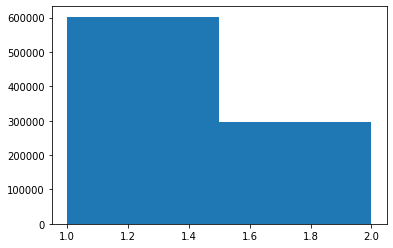

In [4]:
print("user num:{}".format(len(train_user)))
print("user gender 1 part:{}".format(np.sum(train_user['gender']==1)/len(train_user)))
plt.hist(train_user['gender'], bins=2)
plt.show()

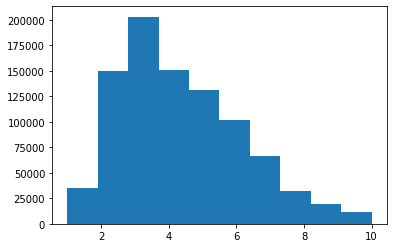

In [5]:
plt.hist(train_user['age'], bins=10)
plt.show()

## 问题
- 性别类别不平衡
- 年龄类别当作分类还是回归

# ad data

In [6]:
train_ad = pd.read_csv('data/train_preliminary/ad.csv')
train_ad.head()
#素材  广告  产品  产民类目  广告主  广告主行业

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,4,4,\N,5,108,202
2,7,7,\N,5,148,297
3,8,8,\N,5,713,213
4,9,9,\N,5,695,213


In [7]:
print("广告个数:{}".format(len(train_ad)))
print("素材id:{}".format(len(np.unique(train_ad['creative_id']))))
print("广告id:{}".format(len(np.unique(train_ad['ad_id']))))
print("产品id:{}".format(len(np.unique(train_ad['product_id']))))
print("产品类别id:{}".format(len(np.unique(train_ad['product_category']))))
print("广告主id:{}".format(len(np.unique(train_ad['advertiser_id']))))
print("广告主行业id:{}".format(len(np.unique(train_ad['industry']))))

广告个数:2481135
素材id:2481135
广告id:2264190
产品id:33273
产品类别id:18
广告主id:52090
广告主行业id:326


## test ad data

In [9]:
test_path = 'data/test/ad.csv'
test_ad = pd.read_csv(test_path)
test_ad.head(5)

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,3,3,\N,5,598,165
2,4,4,\N,5,108,202
3,5,5,\N,5,109,6
4,6,6,\N,5,400,6


In [10]:
print("广告个数:{}".format(len(test_ad)))
print("素材id在训练数据占比:{:.2f}".format(len(set(test_ad['creative_id']) & set(train_ad['creative_id']))/ len(set(test_ad['creative_id']))))
print("广告id在训练数据占比:{:.2f}".format(len(set(test_ad['ad_id']) & set(train_ad['ad_id']))/ len(set(test_ad['ad_id']))))
print("产品id在训练数据占比:{:.2f}".format(len(set(test_ad['product_id']) & set(train_ad['product_id']))/ len(set(test_ad['product_id']))))
print("产品类别id在训练数据占比:{:.2f}".format(len(set(test_ad['product_category']) & set(train_ad['product_category']))/ len(set(test_ad['product_category']))))
print("广告主id在训练数据占比:{:.2f}".format(len(set(test_ad['advertiser_id']) & set(train_ad['advertiser_id']))/ len(set(test_ad['advertiser_id']))))
print("广告主行业id在训练数据占比:{:.2f}".format(len(set(test_ad['industry']) & set(train_ad['industry']))/ len(set(test_ad['industry']))))

广告个数:2618159
素材id在训练数据占比:0.64
广告id在训练数据占比:0.68
产品id在训练数据占比:0.83
产品类别id在训练数据占比:1.00
广告主id在训练数据占比:0.89
广告主行业id在训练数据占比:0.98


## 问题
- 广告id和产品id太多了，如何进行编码
- 测试数据如何在

# log Data

In [11]:
train_log = pd.read_csv('data/train_preliminary/click_log.csv')
train_log.head()

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


In [12]:
train_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30082771 entries, 0 to 30082770
Data columns (total 4 columns):
time           int64
user_id        int64
creative_id    int64
click_times    int64
dtypes: int64(4)
memory usage: 918.1 MB


In [13]:
print("日志条数：{}".format(len(train_log)))
print("用户个数：{}".format(len(np.unique(train_log['user_id']))))
print("用户数据在日志数据中占比：{:.2f}".format(len(set(train_log['user_id']) & set(train_user['user_id'])) / len(train_user)))
print("日志数据在广告数据中占比：{:.2f}".format(len(set(train_log['creative_id']) & set(train_ad['creative_id'])) / len(set(train_log['creative_id']))))

日志条数：30082771
用户个数：900000
用户数据在日志数据中占比：1.00
日志数据在广告数据中占比：1.00


In [15]:
creative_counter = Counter(train_log['creative_id'])
len(creative_counter)

2481135

In [31]:
creative_counter = dict(creative_counter)
choose_num = 0
thresh_hold = 4
for key, value in creative_counter.items():
    if value > thresh_hold:
        choose_num += 1
choose_num

597662

## test log

In [33]:
test_log = pd.read_csv('data/test/click_log.csv')
test_log.head(5)

,time,user_id,creative_id,click_times
0,20,3131989,645764,1
1,20,3131989,1027422,1
2,20,3131989,1106443,1
3,20,3131989,629802,1
4,59,3131989,2839769,1


In [34]:
log_data = pd.concat([train_log, test_log], axis=0, ignore_index=True)

In [35]:
creative_counter = Counter(log_data['creative_id'])
print(len(creative_counter))

3412772


In [44]:
creative_counter = dict(creative_counter)
choose_num = 0
thresh_hold = 10
for key, value in creative_counter.items():
    if value > thresh_hold:
        choose_num += 1
choose_num

538142

In [16]:
print("测试数据用户id个数：{}".format(len(set(test_log['user_id']))))

测试数据用户id个数：1000000


- 所有用户都存在日志文件
- 日志中所有广告都存在相应的广告信息

In [17]:
user_log_num = train_log['user_id'].value_counts()
ad_log_num = train_log['creative_id'].value_counts()

{'whiskers': [<matplotlib.lines.Line2D at 0x16f83348808>,
 'caps': [<matplotlib.lines.Line2D at 0x16f8335ac48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f833426c8>],
 'medians': [<matplotlib.lines.Line2D at 0x16f8335cd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f8336dac8>],
 'means': []}

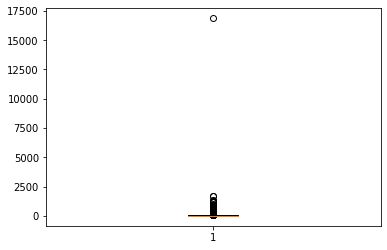

In [18]:
plt.boxplot(user_log_num)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f83ae4988>,
 'caps': [<matplotlib.lines.Line2D at 0x16f83ae4d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f83afab08>],
 'medians': [<matplotlib.lines.Line2D at 0x16f83afcbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f83afcc88>],
 'means': []}

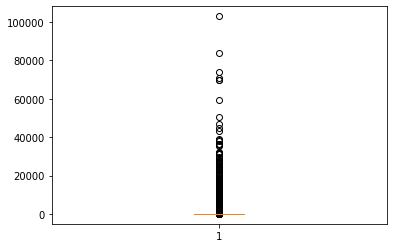

In [19]:
plt.boxplot(ad_log_num)

## 问题
- 用户点击广告信息与天数结合了，导致数据很稀疏，编码很困难

# 解决方案：
## 解决用户标签的不平衡问题？

- 使用损失加权的方式
- 分类

## 如何编码广告信息？

- 目的：减少类别信息的编码，使用除id外更有效的信息进行编码
- 使用日志的序列特征进行编码embedding，每个人的点击广告序列训练word2vec或是词袋模型的tf-idf等。
- 使用其他属性（类别少）表示，可以在训练过程中进行训练，也可以使用上述方法进行预训练。

## 如何解决编码日志信息？

- 序列信息（根据天数定义序列,利用广告id向量，或者利用点击的统计量）
- 整体情况（用户这么多天的整体情况进行编码，利用点击量的统计量，广告id的统计量）

## 编码用户信息

- 使用某一广告的用户序列


In [10]:
train_user = pd.read_csv('data/train_preliminary/user.csv')
train_user.head(-10)

,user_id,age,gender
0,1,4,1
1,2,10,1
2,3,7,2
3,4,5,1
4,5,4,1
...,...,...,...
899985,899986,1,2
899986,899987,5,1
899987,899988,6,1
899988,899989,3,1


In [21]:
train_user.iloc[900000-1]

user_id    900000
age             3
gender          2
Name: 899999, dtype: int64

In [4]:
from tqdm import tqdm

In [5]:
with open('data/temp/creative_seq.txt', 'r', encoding='utf-8') as fr:
    text = []
    user_id = []
    for line in tqdm(fr.readlines()):
        line = line.strip('\n')
        line = line.split()
        id_, sentence = line[0], ' '.join(line[1:])
        text.append(sentence)
        user_id.append(id_)

100%|██████████| 1900000/1900000 [00:12<00:00, 149094.59it/s]


In [33]:
train_user['creative_id'] = text[:900000]
train_user.head()

,user_id,age,gender,sentence,creative_id
0,1,4,1,821396 209778 877468 1683713 122032 71691 1940...,821396 209778 877468 1683713 122032 71691 1940...
1,2,10,1,63441 155822 39714 609050 13069 441462 1266180...,63441 155822 39714 609050 13069 441462 1266180...
2,3,7,2,661347 808612 710859 825434 593522 726940 3920...,661347 808612 710859 825434 593522 726940 3920...
3,4,5,1,39588 589886 574787 1892854 1962706 2264105 12...,39588 589886 574787 1892854 1962706 2264105 12...
4,5,4,1,296145 350759 24333 43235 852327 1054434 12964...,296145 350759 24333 43235 852327 1054434 12964...
